In [37]:
import pandas as pd

In [38]:
# Read csv file
df = pd.read_csv('./data/processed_data/2013-2022_wo_lags.csv')

In [39]:
df["Moneyness"] = df['Underlying_last'] / df["Strike"]

In [40]:
# Filter for quote date between 2014-01-01 and 2022-12-31
df = df[(df['Quote_date'] >= '2014-01-01') & (df['Quote_date'] <= '2022-12-31')]
before_len = len(df)

In [41]:
# Filter TTM < 730
df = df[df['TTM'] < 730]

In [42]:
# Find 5 percentile of Moneyness
moneyness_5 = df['Moneyness'].quantile(0.05)

# Find 95 percentile of Moneyness
moneyness_95 = df['Moneyness'].quantile(0.95)

print(f"5 percentile of Moneyness: {moneyness_5}")
print(f"95 percentile of Moneyness: {moneyness_95}")

5 percentile of Moneyness: 0.8343508645833334
95 percentile of Moneyness: 2.146521951219512


<AxesSubplot: xlabel='Quote_date'>

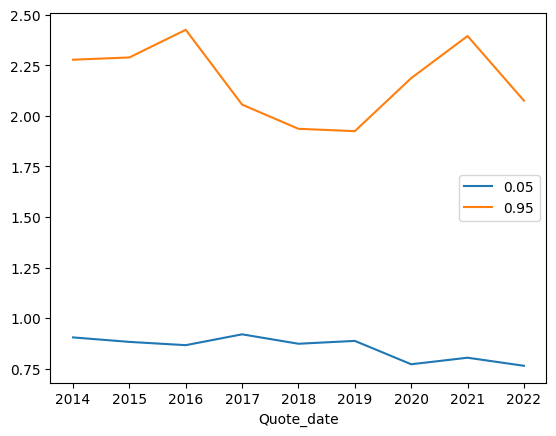

In [43]:
# Make quote date datetime
df['Quote_date'] = pd.to_datetime(df['Quote_date'])

# Plot botton and top 5 percentile of moneyness by year
df.groupby(df['Quote_date'].dt.year)['Moneyness'].quantile([0.05, 0.95]).unstack().plot()

In [44]:
df = df[(df['Moneyness'] >= 0.8) & (df['Moneyness'] <= 2)]

In [45]:
# Save filtered data
df.to_csv('./data/processed_data/2014_2022_moneyness_and_TTM_filtered.csv')

In [46]:
display(df)

,Unnamed: 0,Quote_date,Price,Underlying_last,Strike,TTM,R,Moneyness
405271,405271,2014-01-03,555.455,1831.47,1275.0,7,0.02,1.436447
405272,405272,2014-01-03,530.500,1831.47,1300.0,7,0.02,1.408823
405273,405273,2014-01-03,505.495,1831.47,1325.0,7,0.02,1.382242
405274,405274,2014-01-03,480.355,1831.47,1350.0,7,0.02,1.356644
405275,405275,2014-01-03,455.350,1831.47,1375.0,7,0.02,1.331978
...,...,...,...,...,...,...,...,...
12459084,12459084,2022-12-30,362.600,3839.81,4300.0,721,4.41,0.892979
12459085,12459085,2022-12-30,319.150,3839.81,4400.0,721,4.41,0.872684
12459086,12459086,2022-12-30,279.000,3839.81,4500.0,721,4.41,0.853291
12459087,12459087,2022-12-30,241.950,3839.81,4600.0,721,4.41,0.834741


<AxesSubplot: ylabel='Frequency'>

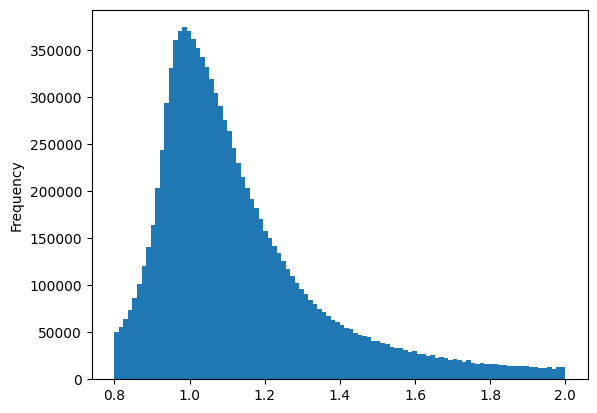

In [47]:
# Plot moneyness distribution
df['Moneyness'].plot.hist(bins=100)

In [48]:
print("Number of rows before filtering: ", before_len)
print("Number of rows after filtering: ", len(df))
print("Percentage of rows kept: ", round(len(df)/before_len*100, 2), "%")

Number of rows before filtering:  12053907
Number of rows after filtering:  10689911
Percentage of rows kept:  88.68 %
